In [1]:
from graph_tool.all import *

from tqdm import tqdm
import numpy as np
import time
import pandas as pd
# import geopandas as gpd
import networkx as nx

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-p51iu27l because the default path (/home/user/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [1860]:
day_type='/weekday'
path='/Users/ismailsaadi/covid19_IDF/eqasim/ile-de-france/output'


df_persons=pd.read_csv(path+day_type+'/persons.csv',';')
#df_persons['person_id_unq']=df_persons.index

/opt/anaconda3/envs/gt/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


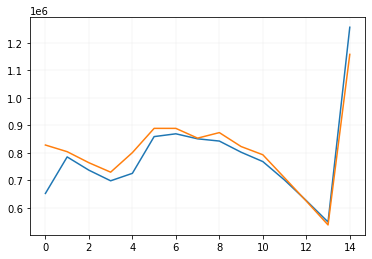

In [1918]:
def get_age_distribution(x):
    y=np.zeros((15,))
    y[0:(len(y)-1)]=x[0:(len(y)-1)]
    y[-1]=x[(len(y)-1):].sum()
    return y

bins=np.hstack((np.arange(95/5+1)*5,999))
a,b=np.histogram(df_persons.age, bins)


age_sample=get_age_distribution(a)
plt.plot(age_sample*10,'-')





df = pd.read_excel('data/estim-pop-nreg-sexe-aq-1975-2021.xlsx', sheet_name='2015')

labels=df.iloc[3,1:21].values
counts=df.iloc[11,1:21].values
mm_age=pd.DataFrame({'age': labels, 'freq': counts})

age_census=get_age_distribution(mm_age.freq)
plt.plot( age_census,'-')

plt.grid(True, lw=0.1)

In [1874]:
df = pd.read_excel('data/estim-pop-nreg-sexe-aq-1975-2021.xlsx', sheet_name='2012')

labels=df.iloc[3,1:21].values
counts=df.iloc[11,1:21].values
mm_age=pd.DataFrame({'age': labels, 'freq': counts})
mm_age

,age,freq
0,0 à 4 ans,835215
1,5 à 9 ans,780370
2,10 à 14 ans,740921
3,15 à 19 ans,724730
4,20 à 24 ans,827804
5,25 à 29 ans,884194
6,30 à 34 ans,888573
7,35 à 39 ans,879251
8,40 à 44 ans,851161
9,45 à 49 ans,835343


In [1883]:
a

array([65252, 78548, 73715, 69853, 72567, 85940, 86958, 85133, 84318,
       80262, 76853, 70122, 62634, 54859, 38266, 30570, 26139, 18277,
        9546,  2944])

In [1879]:
bins=np.hstack((np.arange(95/5+1)*5,999))
a,b=np.histogram(df_persons.age, bins)
a

array([65252, 78548, 73715, 69853, 72567, 85940, 86958, 85133, 84318,
       80262, 76853, 70122, 62634, 54859, 38266, 30570, 26139, 18277,
        9546,  2944])

In [48]:
from numba import jit, njit
from tqdm import tqdm

import time
import pandas as pd
import numpy as np

day_type='/weekday'
path='/Users/ismailsaadi/covid19_IDF/eqasim/ile-de-france/output'


df_persons=pd.read_csv(path+day_type+'/persons.csv',';')
df_persons['person_id_unq']=df_persons.index




day='weekday'
day_type='/'+day
purpose='work'
gdf_work=pd.read_csv('/Users/ismailsaadi/covid19_IDF/myproj/files/{}.csv'.format(purpose), ',')



df_persons['person_id_unq']=df_persons.index
gdf_work_=pd.merge(df_persons[['person_id_unq','person_id']],gdf_work, on='person_id')

mapp=pd.DataFrame({'person_id_unq':gdf_work_.person_id_unq.unique(),'id':np.arange(len(gdf_work_.person_id_unq.unique()))})
gdf_work_=pd.merge(gdf_work_, mapp, on='person_id_unq')


gdf_work_['d']=gdf_work_['end_time']-gdf_work_['start_time']

/opt/anaconda3/envs/gt/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [175]:
from graph_tool.all import *
from tqdm import tqdm

In [ ]:
time_spent_in_layers=np.zeros((N,))

start_time=time.time()
time_spent_in_layers=get_aggregate_timeuse(ind_to_location, time_spent_in_layers)
print(time.time()-start_time)

 15%|████▊                           | 174334/1172756 [00:59<05:59, 2780.86it/s]

In [ ]:
#time_spent_in_layers=np.zeros((N,))

start_time=time.time()
time_spent_in_layers=np.sum(ind_to_location,axis=1)
print(time.time()-start_time)

In [7]:
np.sum(np.array([[1,2],[3,5]]), axis=1)

array([3, 8])

In [20]:
ind_to_location.shape

(1172756, 73194)

In [ ]:
time_spent_in_layers=np.sum(ind_to_location, axis=1)

In [7]:
colocation_matrix=compute_probs_jitted(colocation_matrix, ind_to_location, time_spent_in_layers)

(518310, 4)

In [161]:
gdf_work_.head()

,person_id_unq,person_id,start_time,end_time,geometry,location_id
0,0,68,32489.0,67289.0,POINT (650433.770 6861282.410),29979
1,1,16083,34041.0,68841.0,POINT (651701.360 6857484.350),23724
2,2,16084,34079.0,47279.0,POINT (651993.510 6859981.260),30693
3,2,16084,51179.0,52079.0,POINT (651993.510 6859981.260),30693
4,2,16084,53579.0,66179.0,POINT (651993.510 6859981.260),30693


In [476]:
day_type='/weekday'
path='/Users/ismailsaadi/covid19_IDF/eqasim/ile-de-france/output'

df_trips=pd.read_csv(path+day_type+'/trips.csv',';')

/opt/anaconda3/envs/gt/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [477]:
df_trips[df_trips['mode']=='pt'].shape[0]/df_trips.shape[0]*100

21.07142847272067

In [478]:
df_trips[df_trips['mode']=='pt']

,person_id,trip_index,preceding_activity_index,following_activity_index,departure_time,arrival_time,mode,preceding_purpose,following_purpose,is_first,is_last
0,68,0,0,1,30389.0,32489.0,pt,home,work,True,False
1,68,1,1,2,67289.0,69389.0,pt,work,home,False,True
11,85,0,0,1,37008.0,38208.0,pt,home,work,True,False
12,85,1,1,2,42408.0,44808.0,pt,work,home,False,False
14,85,3,3,4,56808.0,57408.0,pt,other,home,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3618159,11758402,1,1,2,59235.0,62835.0,pt,education,home,False,True
3618162,11758438,0,0,1,32838.0,36738.0,pt,home,work,True,False
3618163,11758438,1,1,2,77838.0,79938.0,pt,work,home,False,True
3618175,11758459,0,0,1,30419.0,32219.0,pt,home,work,True,False


In [509]:
import geopandas as gpd

gdf_trips=gpd.read_file(path+day_type+'/trips.gpkg')
gdf_trips=gdf_trips.to_crs('EPSG:4326')

In [480]:
# gdf_trips_pt=gdf_trips[(gdf_trips['mode']=='pt') & (gdf_trips['following_purpose']=='work')].copy()
gdf_trips_pt=gdf_trips[(gdf_trips['mode']=='pt')].copy()

In [518]:
sx=[]
sy=[]

tx=[]
ty=[]


# assign a trip

with tqdm(total=len(gdf_trips_pt), position=0, leave=True) as pbar:
    for row in gdf_trips_pt.iterrows():
        ff=list(row[1].geometry.coords)
        sx.append(ff[0][0])
        sy.append(ff[0][1])

        tx.append(ff[1][0])
        ty.append(ff[1][1])
        pbar.update(1)
    
    
    
df=pd.DataFrame({'sx':sx, 'sy': sy, 'tx': tx, 'ty': ty})

100%|████████████████████████████████| 762402/762402 [00:45<00:00, 16609.78it/s]


In [520]:
x, y = df.sx, df.sy
df['node_ids_s'] = net.get_node_ids(x, y)

x, y = df.tx, df.ty
df['node_ids_t'] = net.get_node_ids(x, y)

In [526]:
graph_supply_pt.ep['ttime']

<EdgePropertyMap object with value type 'double', for Graph 0x1a593c460, at 0x1b668ca00>

In [545]:
cpt=0

with tqdm(total=len(df), position=0, leave=True) as pbar:
    for row in df[['node_ids_s','node_ids_t']].values:
        cpt+=1
        vtx, edg=shortest_path(graph_supply_pt, graph_supply_pt.vertex(row[0]), graph_supply_pt.vertex(row[1]),weights=graph_supply_pt.ep['ttime'], dag=False)
        pbar.update(1)
        break

cpt

  0%|                                      | 1/762402 [00:00<2:45:37, 76.72it/s]


1

(580123.2525000001, 745707.5175, 6775074.627828561, 6910957.537054999)

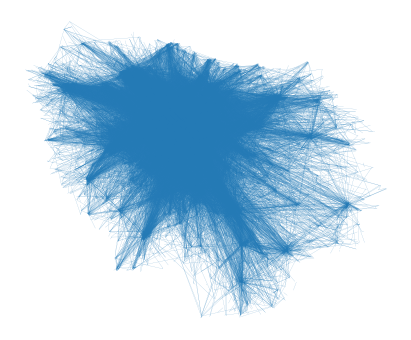

In [134]:
s=2
fig, ax=plt.subplots(figsize=(4*s,3*s))
gdf_trips_pt.plot(lw=0.1, ax=ax)
plt.axis('off')

In [191]:
#gdf_trips.head()

gdf_trips_tpp=gdf_trips[gdf_trips.arrival_time<12.*3600]

In [192]:
#K=Graph(directed=False)


In [193]:
x=[list(k.coords)[1][0] for k in gdf_trips_tpp.geometry ]
y=[list(k.coords)[1][1] for k in gdf_trips_tpp.geometry ]
at=[k/3600 for k in gdf_trips_tpp.arrival_time ]

In [194]:
df_targets=pd.DataFrame({'x': x, 'y': y, 'at': at})

In [195]:
gdf_targets = gpd.GeoDataFrame(df_targets, geometry=gpd.points_from_xy(df_targets.x, df_targets.y), crs=gdf_trips_tpp.crs)

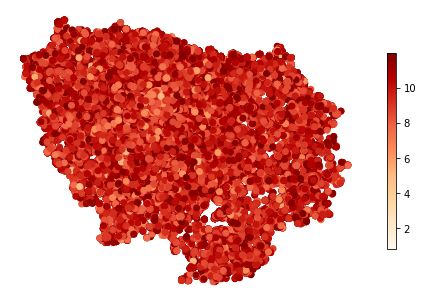

In [197]:
# spatial emergence 


s=2
fig, ax=plt.subplots(figsize=(4*s,3*s))
#gdf_trips_tpp.plot(lw=0.1/2, ax=ax, color='lightgrey')
gdf_targets.plot(column='at',ax=ax, legend=True, cmap='OrRd',legend_kwds={'shrink': 0.6})
plt.axis('off')
plt.show()

In [470]:
graph_supply_pt=load_graph('pt/weighted_graph_{}_{}.xml.gz'.format('supply', 'pt'))

In [492]:
import pandana as pdna

In [499]:
graph_supply_pt.ep['ttime']

<EdgePropertyMap object with value type 'double', for Graph 0x1a593c460, at 0x1b668ca00>

In [493]:
nodes=pd.DataFrame({'x': graph_supply_pt.vp['x'], 'y': graph_supply_pt.vp['y']})

In [500]:
edges=pd.DataFrame({'from': graph_supply_pt.get_edges()[:,0], 'to': graph_supply_pt.get_edges()[:,1], 'weight': graph_supply_pt.ep['ttime']})

In [502]:
net=pdna.Network(nodes["x"], nodes["y"], edges["from"], edges["to"], edges[["weight"]])

Generating contraction hierarchies with 12 threads.
Setting CH node vector of size 31488
Setting CH edge vector of size 228705
Range graph removed 388918 edges of 457410
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [503]:
net.precompute(3000)

In [402]:
# Estimated age mobility model (EQASIM)
day_type='/weekday'
path='/Users/ismailsaadi/covid19_IDF/eqasim/ile-de-france/output'
df_persons=pd.read_csv(path+day_type+'/persons.csv',';')

pscale=1/10
k=5
#bins=np.arange(95/k+1)*k
#bins=np.hstack((bins, 999))
bins=np.array([0,11,19,65,120])
agg_mm_age_bm, b=np.histogram(df_persons['age'].values, bins)

<BarContainer object of 4 artists>

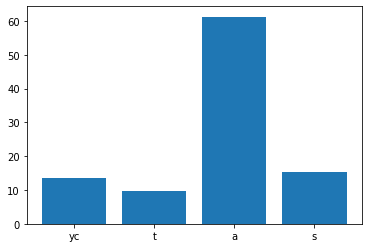

In [403]:
plt.bar(['yc','t','a','s'],agg_mm_age_bm/agg_mm_age_bm.sum()*100)

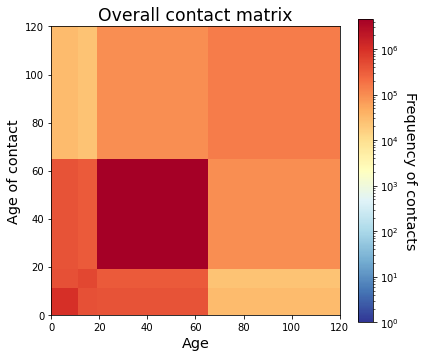

In [404]:
cctc=get_contacts_fast(G_0)

cmap = mpl.cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad(color='white', alpha=0.1)

size_window=6.
fig, ax=plt.subplots(figsize=(size_window,size_window), tight_layout=True)
pp2=ax.hist2d(cctc[:,0],cctc[:,1],bins=bins, cmap=cmap, norm=mpl.colors.LogNorm(vmin=1))

    
ax.set_xlabel('Age', fontsize='x-large')
ax.set_ylabel('Age of contact', fontsize='x-large')
ax.set_aspect('equal')
ax.set_title('{}'.format('Overall contact matrix'), fontsize='xx-large')

cbar=fig.colorbar(pp2[3], ax=ax, shrink=.75)
cbar.set_label('Frequency of contacts',fontsize='x-large',rotation=270, va='bottom')

plt.show()

(-0.5, 3.5, 3.5, -0.5)

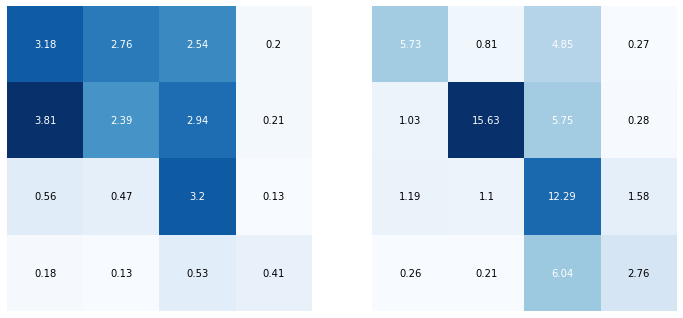

In [508]:
labels=['yc','t','a','s']

observed_matrix=np.array([[5.73, 0.81, 4.85, 0.27],[1.03, 15.63, 5.75, 0.28],[1.19, 1.10, 12.29, 1.58],[0.26, 0.21, 6.04, 2.76]])
estimated_matrix=pp2[0].copy()
estimated_matrix[np.diag_indices_from(estimated_matrix)] /= 2


#ffx=np.where(agg_mm_age_bm>0) # no zero anyway
estimated_matrix=estimated_matrix/agg_mm_age_bm[None,:]
estimated_matrix=estimated_matrix.T

scale=3.
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(4*scale,3*scale))
ax.imshow(estimated_matrix, cmap='Blues')
ax2.imshow(observed_matrix, cmap='Blues')

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)


# We want to show all ticks...
ax2.set_xticks(np.arange(len(labels)))
ax2.set_yticks(np.arange(len(labels)))

# ... and label them with the respective list entries
ax2.set_xticklabels(labels)
ax2.set_yticklabels(labels)


# Loop over data dimensions and create text annotations.
for i in range(4):
    for j in range(4):
        if np.round(estimated_matrix[i, j],2)>2.:
            color='white'
        else:
            color='black'
            
        text = ax.text(j, i, np.round(estimated_matrix[i, j],2),
                       ha="center", va="center", color=color)
        
        
# Loop over data dimensions and create text annotations.
for i in range(4):
    for j in range(4):
        
        if np.round(observed_matrix[i, j],2)>3.:
            color='white'
        else:
            color='black'
        
        text = ax2.text(j, i, np.round(observed_matrix[i, j],2),
                       ha="center", va="center", color=color)
        
ax.axis('off')
ax2.axis('off')

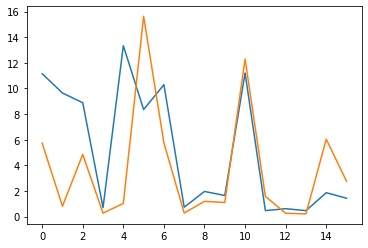

In [465]:
plt.plot(estimated_matrix.reshape(-1)*3.5)
plt.plot(observed_matrix.reshape(-1))

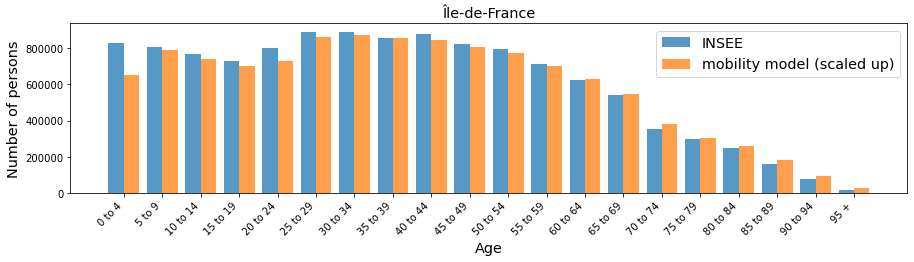

In [554]:
# Observed age distributions (INSEE)

year='2015'
df = pd.read_excel('data/estim-pop-nreg-sexe-aq-1975-2021.xlsx', sheet_name=year)

labels=df.iloc[3,1:21].values
counts=df.iloc[11,1:21].values # 17-FR, 11-IDF
dffp=pd.DataFrame({'age': labels, 'freq': counts})


# Estmated age mobility model (EQASIM)
day_type='/weekday'
path='/Users/ismailsaadi/covid19_IDF/eqasim/ile-de-france/output'
df_persons=pd.read_csv(path+day_type+'/persons.csv',';')

pscale=1/10
k=5
bins=np.arange(95/k+1)*k
bins=np.hstack((bins, 999))
agg_mm_age, b=np.histogram(df_persons['age'].values, bins)


scale=1.25

#heights=[1., 3.17, 1.55, 1.86, 0.23]

width=0.4

fig, ax=plt.subplots(figsize=(3*4*scale,2.5*scale))
ax.bar(np.arange(dffp['age'].shape[0])-width/2, dffp['freq'].values, width=width,label='INSEE', alpha=0.75)
ax.bar(np.arange(dffp['age'].shape[0])+width/2, agg_mm_age*1/pscale, width=width,label='mobility model (scaled up)', alpha=0.75)

ax.set_ylabel('Number of persons', fontsize='x-large')
ax.set_xlabel('Age', fontsize='x-large')
#ax.set_title('Year '+year, fontsize='x-large')
ax.set_title('Île-de-France', fontsize='x-large')

ax.set_xticks(np.arange(len(dffp['age'].values)))


dffp['age']=dffp['age'].str.replace('à','to')
dffp['age']=dffp['age'].str.replace(' ans','')
dffp['age']=dffp['age'].str.replace('et plus','+')

ax.set_xticklabels(dffp['age'].str.replace('à','to'))

#ax.set_xticks(dffp['age'].values)

for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

ax.legend(fontsize='x-large')
fig.savefig('outputs/dist_age_{}.pdf'.format('idf'), bbox_inches='tight')
plt.show()

In [537]:
G_0=load_graph('files/graph_{}_{}.xml.gz'.format('weekday','household'))
#G_1=load_graph('files/graph_{}_{}_updated.xml.gz'.format('weekday','work'))
G_2=load_graph('files/graph_{}_{}_updated.xml.gz'.format('weekday','education'))
#G_3=load_graph('files/graph_{}_{}_updated.xml.gz'.format('weekday','leisure'))


#G_4=load_graph('files/graph_{}_{}_updated.xml.gz'.format('weekday','shop'))
#G_5=load_graph('files/graph_{}_{}_updated.xml.gz'.format('weekday','other'))
print('merging ...')



# merge
G_0.add_edge_list(G_1.get_edges())
G_0.add_edge_list(G_2.get_edges())
G_0.add_edge_list(G_3.get_edges())
#G_0.add_edge_list(G_4.get_edges())
#G_0.add_edge_list(G_5.get_edges())

merging ...


In [455]:
def get_contacts_fast(G):
    #acp=np.asarray([[G.nodes[edge[0]]['age'], G.nodes[edge[1]]['age']] for edge in G.edges(data=False)])
    e=G.get_edges()
    v=G.get_vertices(vprops=[G.vp['age']])
    
    
    
    acp=np.vstack((v[e[:,0],1],v[e[:,1],1])).T
    #f=(acp[:,0]!=acp[:,1])
    rvp=np.vstack((acp,acp[:,[1,0]]))
    
    #f=~f
    #print(acp[~f])
    #rvp=np.vstack((acp[f],rvp)) # diagonal is counted once

    return rvp

get_contacts_fast(G_0)

array([[31, 31],
       [31, 22],
       [31, 55],
       ...,
       [23, 53],
       [71, 53],
       [15, 53]])

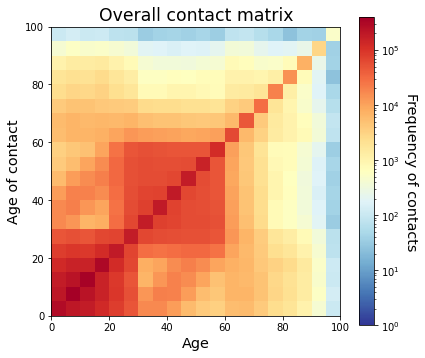

In [555]:
import matplotlib as mpl

#def get_contacts_fast(G):
#    #acp=np.asarray([[G.nodes[edge[0]]['age'], G.nodes[edge[1]]['age']] for edge in G.edges(data=False)])
#    e=G.get_edges()
#    v=G.get_vertices(vprops=[G.vp['age']])
    
    
#    acp=np.vstack((v[e[:,0],1],v[e[:,1],1])).T
#    return np.vstack((acp,acp[:,[1,0]]))


k=5
bins=np.arange(100/k+1)*k
#bins=np.hstack((bins, 999))

cctc=get_contacts_fast(G_0)

cmap = mpl.cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad(color='white', alpha=0.1)

size_window=6.
fig, ax=plt.subplots(figsize=(size_window,size_window), tight_layout=True)
pp=ax.hist2d(cctc[:,0],cctc[:,1],bins=bins, cmap=cmap, norm=mpl.colors.LogNorm(vmin=1))
    
ax.set_xlabel('Age', fontsize='x-large')
ax.set_ylabel('Age of contact', fontsize='x-large')
ax.set_aspect('equal')
ax.set_title('{}'.format('Overall contact matrix'), fontsize='xx-large')

cbar=fig.colorbar(pp[3], ax=ax, shrink=.75)
cbar.set_label('Frequency of contacts',fontsize='x-large',rotation=270, va='bottom')

fig.savefig('outputs/ocontact_matrix_{}.pdf'.format('idf'), bbox_inches='tight')

plt.show()

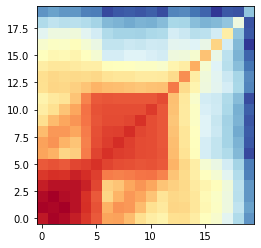

In [539]:
overall_contact_matrix=pp[0].copy()
overall_contact_matrix[np.diag_indices_from(overall_contact_matrix)] /= 2
plt.imshow(np.log(overall_contact_matrix), origin='lower', cmap='RdYlBu_r')

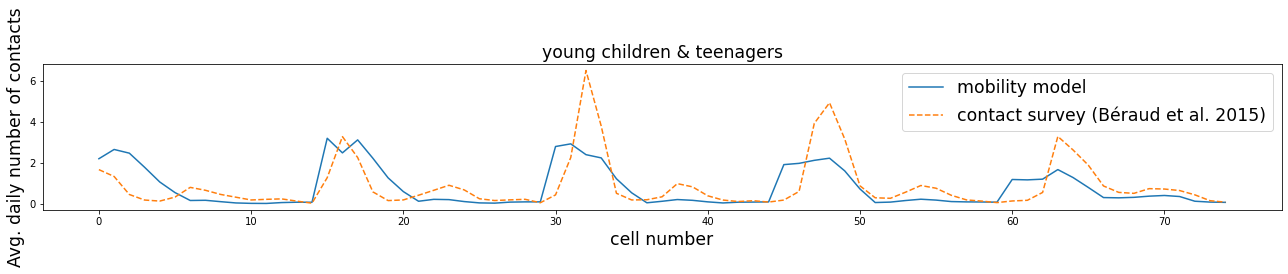

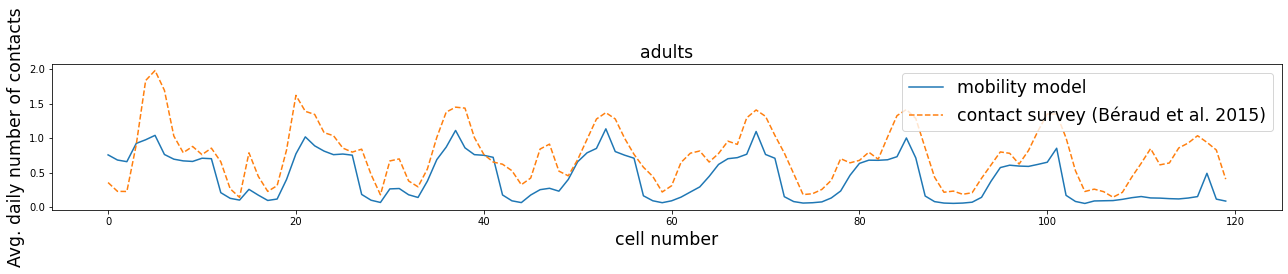

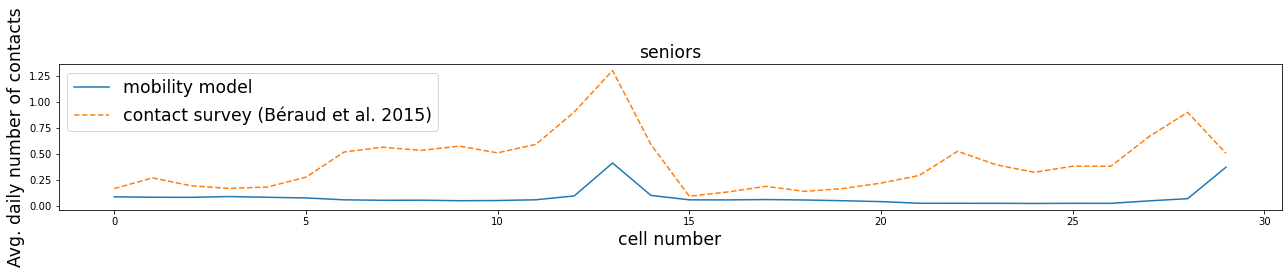

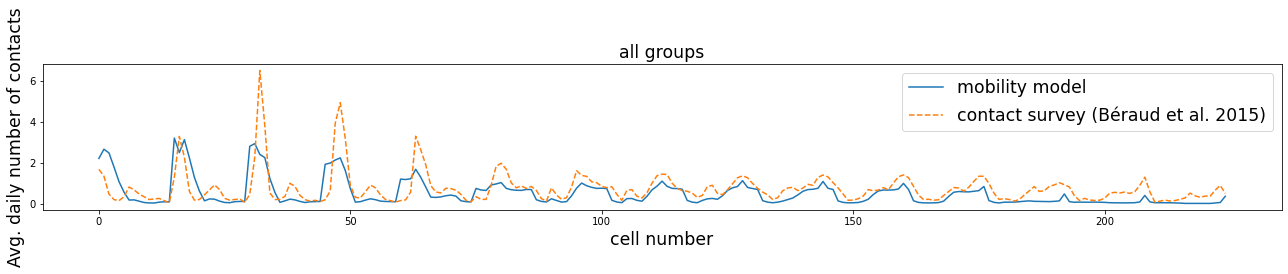

In [540]:
# mobility model
Z=overall_contact_matrix.copy()
#Z[np.diag_indices_from(Z)] /= 2
ffx=np.where(agg_mm_age>0) # no zero anyway
Z[:,ffx]=Z[:,ffx]/agg_mm_age[None,ffx]
Z1=Z
Z1=Z1[0:15, 0:15]


# contact survey 
#survey_mat_nzd=np.triu(survey_mat)*agg_mm_age[0:15][None,0:15]
survey_mat_nzd=survey_mat*dffp['freq'].values[None,0:survey_mat.shape[0]] #[0:15][None,0:15]
Z2=survey_mat_nzd.astype(float)


for lb, up, lbb in zip([0,5,13,0], [5,13,15,15], ['young children & teenagers','adults','seniors', 'all groups']):


    ##
    scale=1

    s=4.5
    fig, ax=plt.subplots(figsize=(4*s,.7*s), tight_layout=True)

    ax.plot(Z1[lb:up].reshape(-1),'-',label='mobility model')
    ax.plot(Z2[lb:up].reshape(-1), '--',label='contact survey (Béraud et al. 2015)')

    #ax.plot((Z1.reshape(-1)-Z2.reshape(-1))**2, '--',label='error')

    ax.legend(fontsize='xx-large', loc='best')
    #ax.grid(True, lw=0.1)

    ax.set_xlabel('cell number', fontsize='xx-large')
    ax.set_ylabel('Avg. daily number of contacts', fontsize='xx-large')

    #ax.set_yticks(np.arange(3)*4)
    #ax.set_xlim(0-5, 15**2)
    #ax.set_ylim(0,7)
    
    ax.set_title(lbb, fontsize='xx-large')
    
    


    font = {'family': 'calibri',
            'color':  'k',
            'weight': 'normal',
            'size': 20,
            }
    #ax.text(80, 6, r'$\rho$ = 0.76 (p < 0.001)', fontdict=font)


    fig.savefig('outputs/validation_{}.pdf'.format(lbb), bbox_inches='tight')

In [ ]:
# issues-> 

# (1) we compare contact survey of FRANCE with mobility model of Ile-de-FRANCE
# (2) smooted contact survey / non-smoothed mobility model
# (3) underestimated yc in eqasim


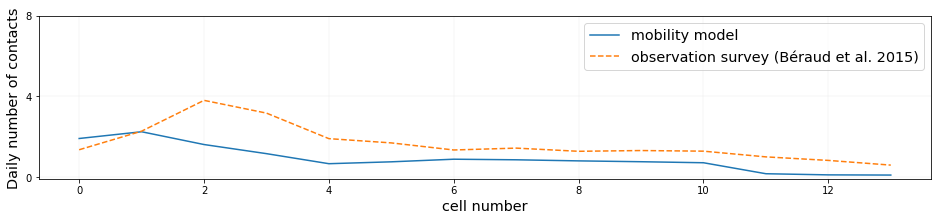

In [518]:
scale=1
#scale=np.mean(Z1)/np.mean(Z2)
#scale=10**5

k=1

s=4.
fig, ax=plt.subplots(figsize=(4*s,.75*s))

ax.plot(np.diag(Z1,k),'-',label='mobility model')
ax.plot(np.diag(Z2,k), '--',label='observation survey (Béraud et al. 2015)')

ax.legend(fontsize='x-large', loc='best')
ax.grid(True, lw=0.1)


ax.set_xlabel('cell number', fontsize='x-large')
ax.set_ylabel('Daily number of contacts', fontsize='x-large')


ax.set_yticks(np.arange(3)*4)
#ax.set_ylim(0,7)
#fig.savefig('outputs/validation.pdf')
plt.show()

Coefficient of determination: 0.72
Coefficients: 
 1.454060121828783
Coefficient of correlation: 0.85
p-value:  8.09678527903995e-29


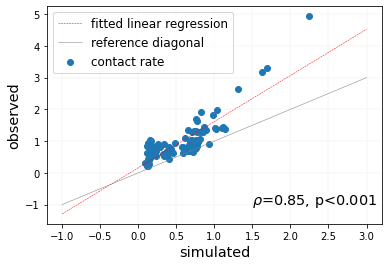

In [558]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


lb=0

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets

dim=Z1[3:-2, 3:-2].shape[0]*Z1[3:-2, 3:-2].shape[0]

x=Z1[3:-2, 3:-2].reshape(-1)
x=x.reshape((dim,1))
y=Z2[3:-2, 3:-2].reshape(-1)

#x=np.log(x)
#y=np.log(y)


regr.fit(x, y)





lb=20
#[0,5],regr.predict([0,5])
plt.scatter(x,y, alpha=1., label='contact rate')
n=3
#plt.plot([0,10/n],[0,10/n], color='r')
plt.grid(True, lw=0.1)



# Make predictions using the testing set
y_pred = regr.predict(np.array([-1,3]).reshape(-1, 1))

#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(np.array([-1,3]).reshape(-1), y_pred, '--',color='red', linewidth=.5, label='fitted linear regression')


plt.plot([-1,3],[-1,3], color='gray', lw=0.5, label='reference diagonal')

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y, regr.predict(x.reshape(-1, 1))))

# The coefficients
print('Coefficients: \n', regr.coef_[0])
# The mean squared error
#print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))


print('Coefficient of correlation: %.2f' % stats.pearsonr(x.reshape(-1), y)[0])
print('p-value: ', stats.pearsonr(x.reshape(-1), y)[1])
#plt.xlim(0, 3)
#plt.ylim(0, 3)
#plt.axis('equal')

plt.xlabel('simulated',fontsize='x-large')
plt.ylabel('observed',fontsize='x-large')

plt.text(1.5, -1, r'$\rho$=0.85, p<0.001', fontsize='x-large')

plt.legend(fontsize='large')

plt.savefig('outputs/correlation_{}.pdf'.format('idf'), bbox_inches='tight')
plt.show()

In [134]:
education_weekday=np.loadtxt('files/contact_rates_education.txt')
work_weekday=np.loadtxt('files/contact_rates_work.txt')

In [1286]:
k=5
bins=np.arange(70/k+1)*k
bins=np.hstack((bins, 999))
agg_mm_age, b=np.histogram(age, bins)
a=agg_mm_age
a=a/a.sum()

In [1287]:
# Survey
mm_age=pd.read_csv('data/marginals.csv',';')
mm_age=mm_age['Counts']

agg_mm_age=np.zeros((15,))

for k in range(15):
    
    if k==14:
        agg_mm_age[k]=mm_age[(k*5):].sum()
    else:
        agg_mm_age[k]=mm_age[k*5:(k+1)*5].sum()
        
b=agg_mm_age
b=b/b.sum()

/opt/anaconda3/envs/gt/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


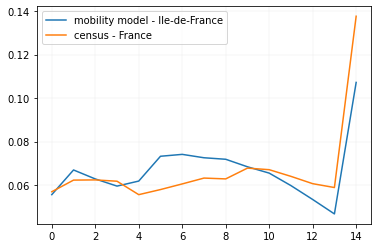

In [1292]:
plt.plot(a, label='mobility model - Ile-de-France')
plt.plot(b, label='census - France')
plt.grid(True, lw=0.1)
plt.legend()

In [94]:
# compare network statistics

G_hh=load_graph('files/graph_{}_{}.xml.gz'.format('weekend','household'))
G_ww=load_graph('files/graph_{}_{}_updated.xml.gz'.format('weekday','work'))
G_ss=load_graph('files/graph_{}_{}_updated.xml.gz'.format('weekday','education'))

In [104]:
G_ss.get_total_degrees(G_ss.get_vertices()).mean()

2.432732810576113

12.097705974642752 11.0


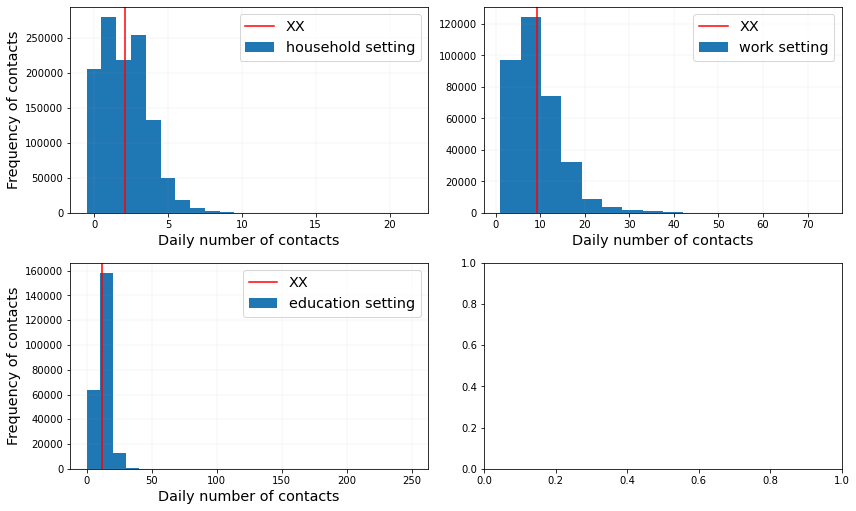

In [101]:
scale=1.2
fig, ax=plt.subplots(ncols=2, nrows=2, tight_layout=True, figsize=(4*2.5*scale,3*2*scale))

# ax1
degrees=G_hh.get_total_degrees(G_hh.get_vertices())
unq, cnt=np.unique(degrees, return_counts=True)

ax[0,0].bar(unq, cnt, 1., label='household setting')
ax[0,0].grid(True, lw=0.1)
ax[0,0].axvline(x=degrees.mean(), color='red',label='XX')
ax[0,0].legend(fontsize='x-large')
#print(degrees.mean())
ax[0,0].set_ylabel('Frequency of contacts', fontsize='x-large')
ax[0,0].set_xlabel('Daily number of contacts', fontsize='x-large')



# ax2
degrees=G_ww.get_total_degrees(G_ww.get_vertices())

degrees=G_ww.get_total_degrees(G_ww.get_vertices())
degrees=degrees[degrees>0]
unq, cnt=np.unique(degrees, return_counts=True)

#ax2.bar(unq, cnt, 1., label='household setting')
ax[0,1].hist(degrees, bins=2**4, label='work setting')
ax[0,1].grid(True, lw=0.1)
ax[0,1].axvline(x=degrees.mean(), color='red',label='XX')
ax[0,1].legend(fontsize='x-large')
#print(degrees.mean())
#ax2.set_ylabel('Frequency of contacts', fontsize='x-large')
ax[0,1].set_xlabel('Daily number of contacts', fontsize='x-large')




# ax3
degrees=G_ss.get_total_degrees(G_ss.get_vertices())
degrees=degrees[degrees>0]
unq, cnt=np.unique(degrees, return_counts=True)

#plt.bar(unq, cnt, 1., label='workplace setting')
ax[1,0].hist(degrees, bins=np.arange(26)*10, label='education setting')
ax[1,0].grid(True, lw=0.1)
ax[1,0].axvline(x=degrees.mean(), color='red',label='XX')
ax[1,0].legend(fontsize='x-large')
print(degrees.mean(), np.median(degrees))
ax[1,0].set_xlabel('Daily number of contacts', fontsize='x-large')
ax[1,0].set_ylabel('Frequency of contacts', fontsize='x-large')



plt.show()

13.64391424707593 13.0


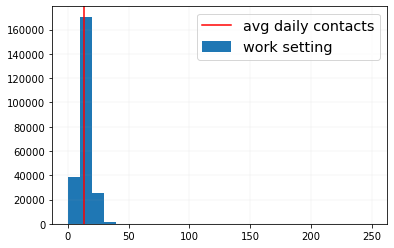

In [1830]:
degrees=G_ss.get_total_degrees(G_ss.get_vertices())
degrees=degrees[degrees>0]
unq, cnt=np.unique(degrees, return_counts=True)

#plt.bar(unq, cnt, 1., label='workplace setting')
plt.hist(degrees, bins=np.arange(26)*10, label='work setting')
plt.grid(True, lw=0.1)
plt.axvline(x=degrees.mean(), color='red',label='avg daily contacts')
plt.legend(fontsize='x-large')
print(degrees.mean(), np.median(degrees))

In [ ]:
fig, ax=plt.subplots(figsize=(size_window,size_window), tight_layout=True)

cmap = mpl.cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad(color='white', alpha=0.1)
pp=ax.hist2d(np.arange(100),np.arange(100),bins=10, cmap=cmap, norm=mpl.colors.LogNorm(vmin=1))
    
ax.set_xlabel('Age', fontsize='xx-large')
ax.set_ylabel('Age of contact', fontsize='xx-large')
ax.set_aspect('equal')
ax.set_title('{}'.format(purpose), fontsize='xx-large')

#cax = fig.add_axes([.8, 0., 0.025, 1.])

cbar=fig.colorbar(pp[3], ax=ax, shrink=.75)

fig.savefig('files/{}_{}.pdf'.format(purpose, day_type.replace('/','')) , bbox_inches='tight')

cbar.set_label('Frequency of contacts',fontsize='x-large',rotation=270, va='bottom')

In [2025]:
degrees=G_ww.get_total_degrees(G_ww.get_vertices())
degrees=degrees[degrees>0]
print(np.mean(degrees))

9.046413502109704


In [60]:
p=np.random.randint(low=10, high=50, size=10)
p

array([24, 38, 24, 24, 34, 29, 46, 42, 21, 10])

In [6]:
beta=8.5 # 8.5 contacts per day on avg
w=1.


In [67]:
n=len(p)
f=-beta*n/w+np.sum(np.reciprocal(p+w-1)*(p-1))
f

0.1882866422343622

In [70]:
y=[]
x=[]

for w in range(40):
    if w>0:
        f=-beta*n/w+np.sum(np.reciprocal(p+w-1)*(p-1))
        y.append(f)
        x.append(w)

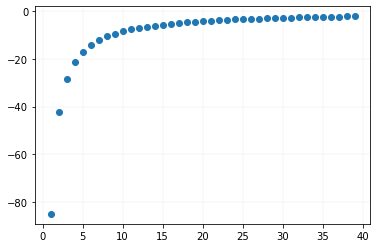

In [71]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.grid(True, lw=0.1)

In [72]:
w=1000.

sigma=0.2
#mu=w*(n-1)/(w+n-1)

avv=[]

for n in p:
    mu=w*(n-1)/(w+n-1)
    k=mu**2/sigma
    t=sigma/mu

    print(np.mean(np.random.gamma(k, t, n)))
    
    avv.append(np.mean(np.random.gamma(k, t, n)))
    #print('---',n)

22.526366367028242
35.76921627396411
22.4164816432915
22.50053196974659
31.947576180284567
27.131381752783977
43.06651264297488
39.43263070558344
19.530253666076497
9.126563361755455


(0.0, 3.5)

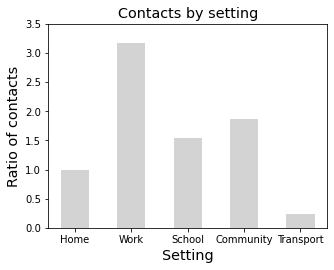

In [343]:
scale=1.25

heights=[1., 3.17, 1.55, 1.86, 0.23]


fig, ax=plt.subplots(figsize=(4*scale,3*scale))
ax.bar(['Home','Work','School','Community','Transport'], heights, color='lightgrey',width=.5)
ax.set_ylabel('Ratio of contacts', fontsize='x-large')
ax.set_xlabel('Setting', fontsize='x-large')
ax.set_title('Contacts by setting', fontsize='x-large')
ax.set_ylim(0, 3.5)

In [345]:
nb_contacts_HH=G_0.num_edges()-(G_1.num_edges()+G_2.num_edges()+G_3.num_edges())

In [346]:
nb_contacts_WP=G_1.num_edges()

In [347]:
nb_contacts_SP=G_2.num_edges()

(0.0, 3.5)

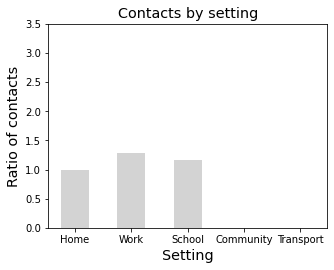

In [348]:
scale=1.25

heights=[1., nb_contacts_WP/nb_contacts_HH, nb_contacts_SP/nb_contacts_HH, 0, 0]


fig, ax=plt.subplots(figsize=(4*scale,3*scale))
ax.bar(['Home','Work','School','Community','Transport'], heights, color='lightgrey',width=.5)
ax.set_ylabel('Ratio of contacts', fontsize='x-large')
ax.set_xlabel('Setting', fontsize='x-large')
ax.set_title('Contacts by setting', fontsize='x-large')
ax.set_ylim(0, 3.5)

In [571]:
# layer-based parameter
w=20.

# place-based parameter
n=10

x=w*(n-1)/(w+n-1)


mu=x # k-theta
sigma=0.2 # (see ref.)

scale=sigma/mu
shape=mu/scale

# random sample from gamma
lb=np.random.gamma(shape, scale, 1)

np.random.poisson(lb, n)

array([4, 9, 7, 7, 8, 6, 9, 6, 3, 8])

In [565]:
x

7.346938775510204

In [566]:
lb

array([7.62494312])

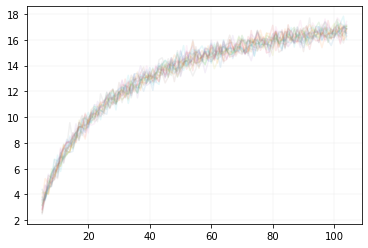

In [596]:
    
def sample(n):
    w=20.
    x=w*(n-1)/(w+n-1)


    mu=x # k-theta
    sigma=0.2 # (see ref.)

    scale=sigma/mu
    shape=mu/scale

    # random sample from gamma
    return np.random.gamma(shape, scale, 1)[0]



for p in range(20):
    n=np.arange(100)+5

    plt.plot(n,[sample(k) for k in n], alpha=0.1)
    plt.grid('True', lw=0.1)